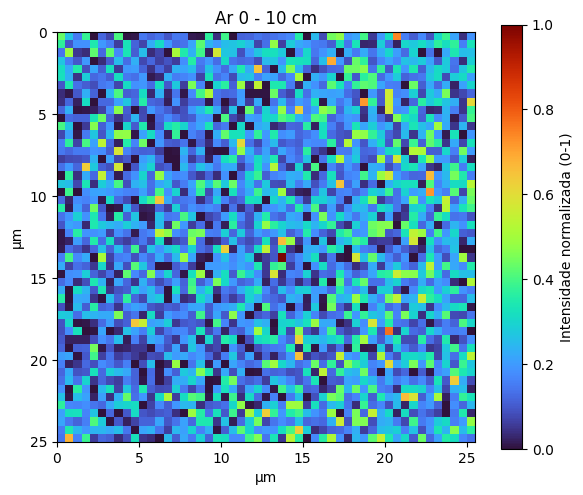

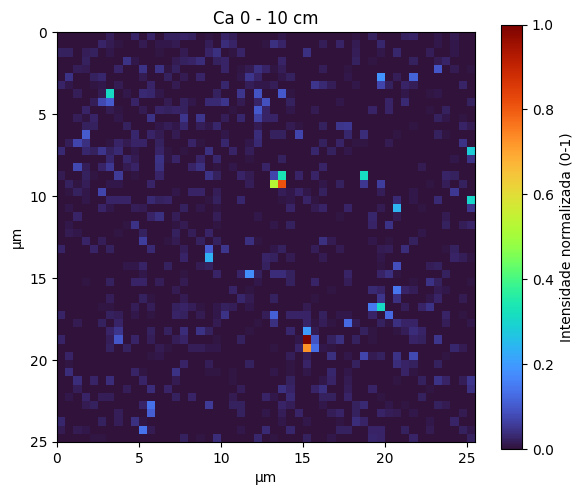

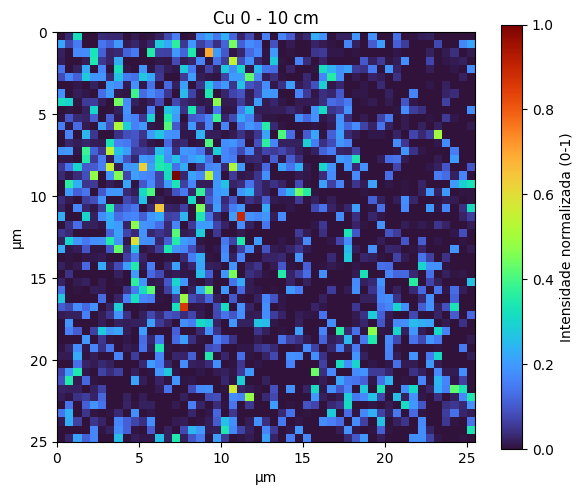

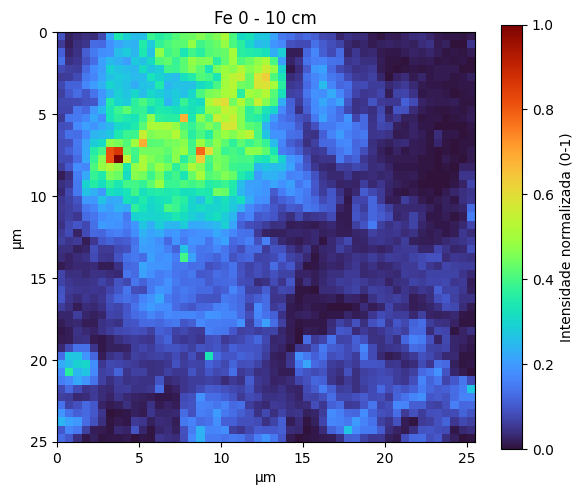

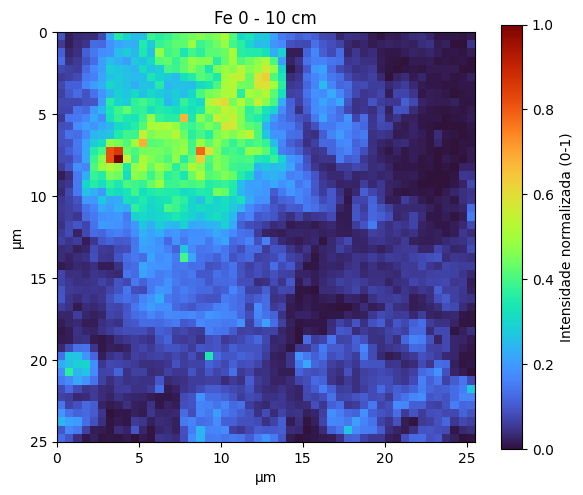

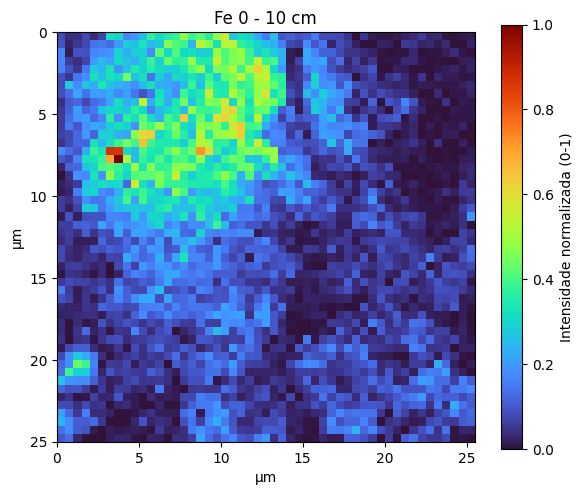

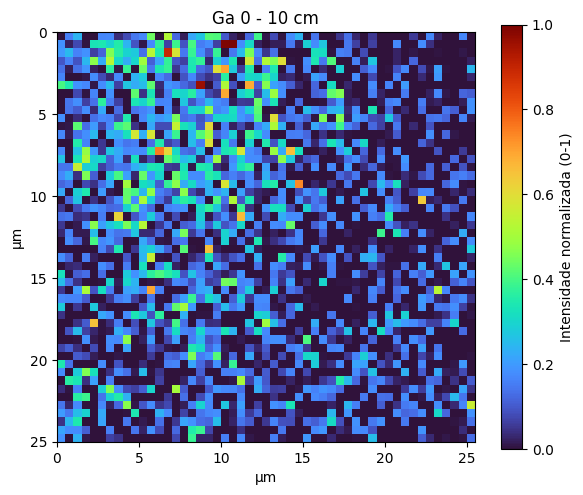

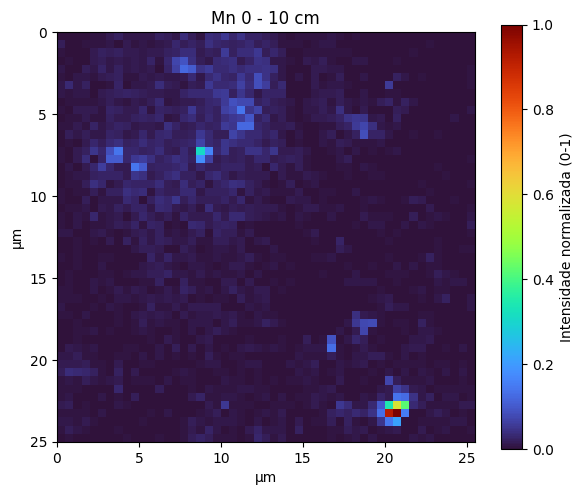

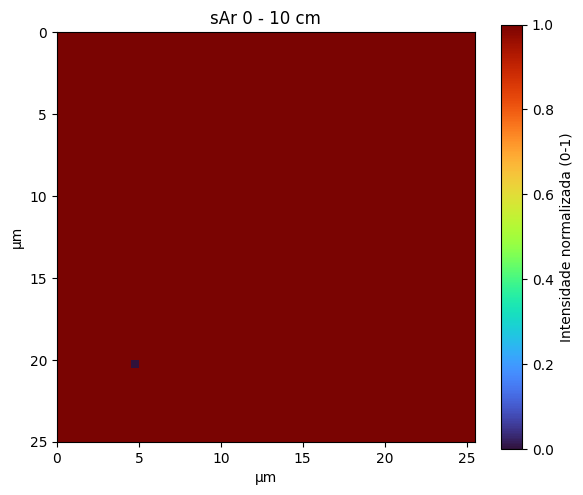

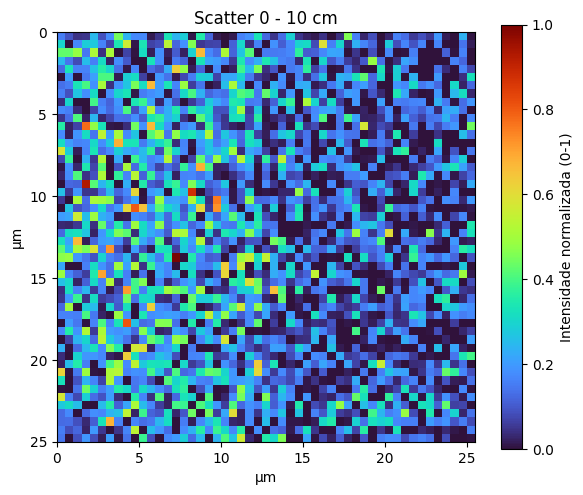

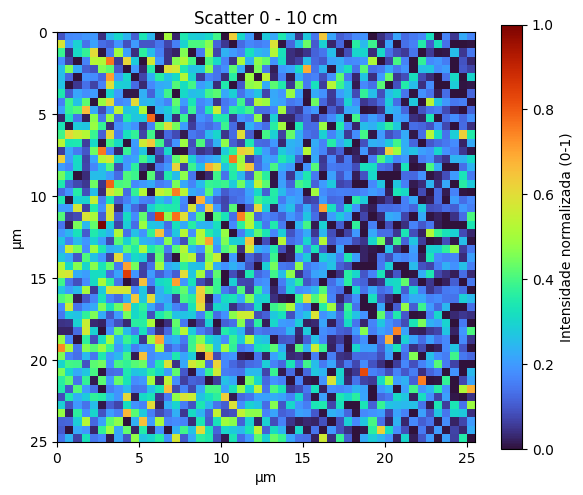

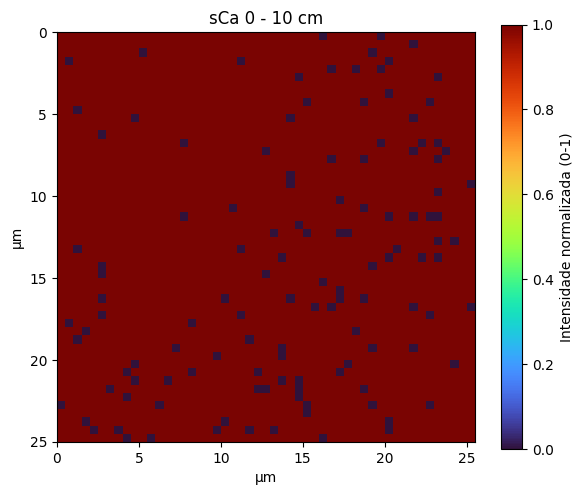

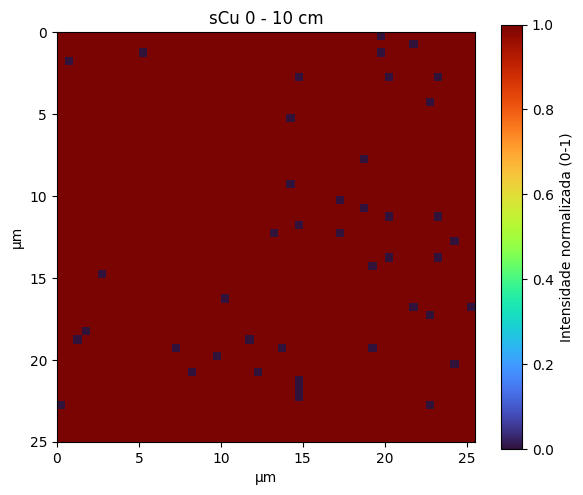

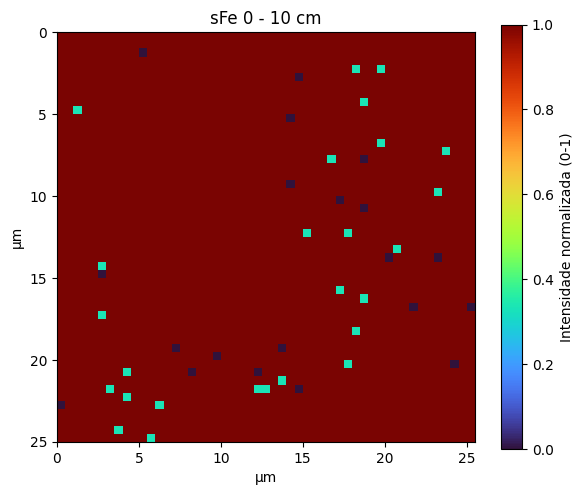

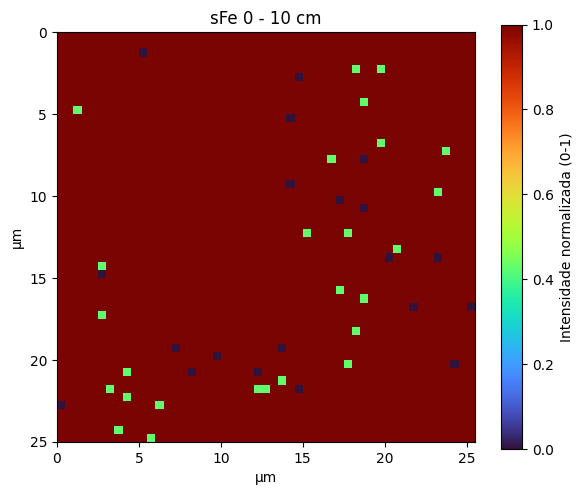

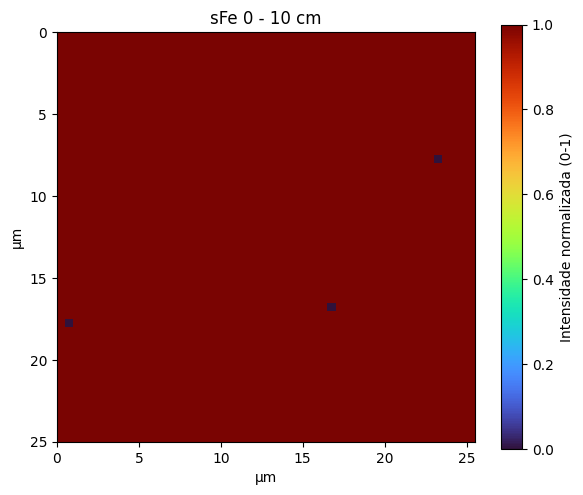

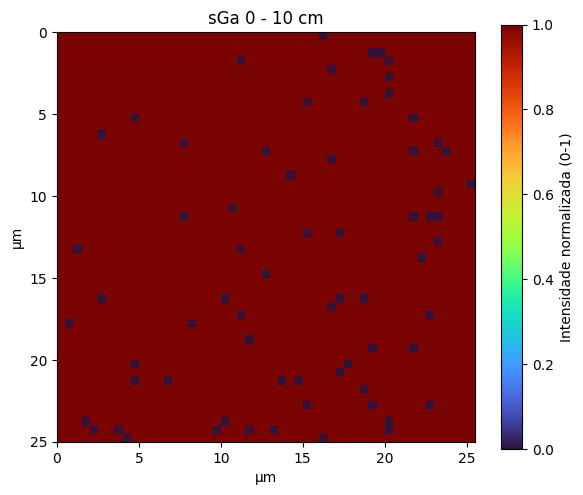

C:\Users\davi23037\AppData\Local\Temp\ipykernel_15296\3602128194.py:22: RuntimeWarning: invalid value encountered in divide
  img_norm = (img - img.min()) / (img.max() - img.min())


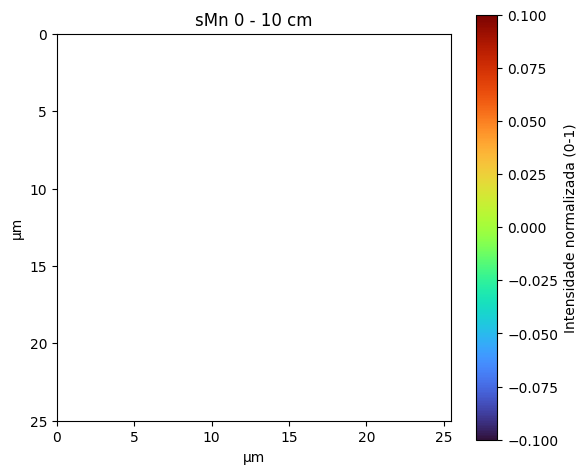

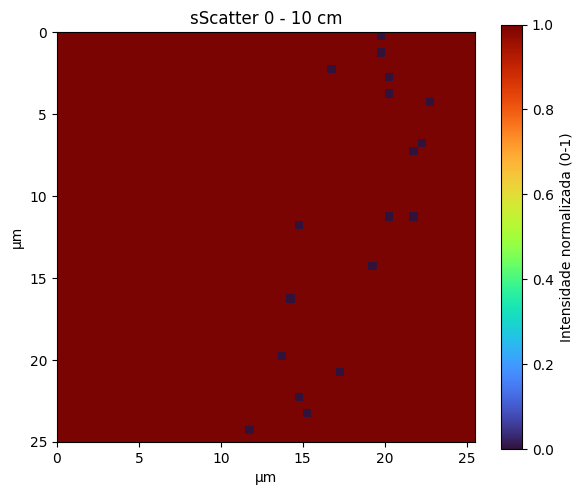

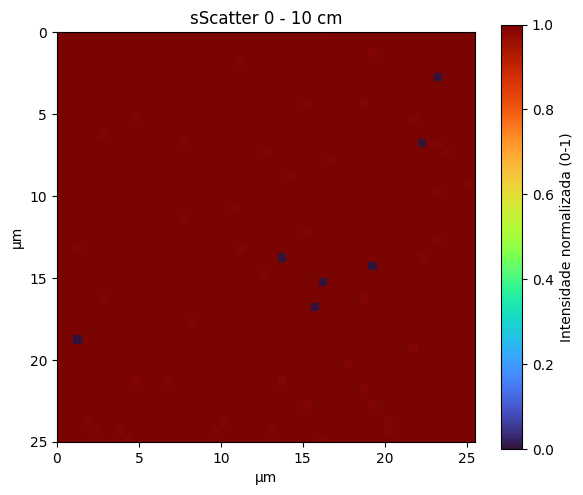

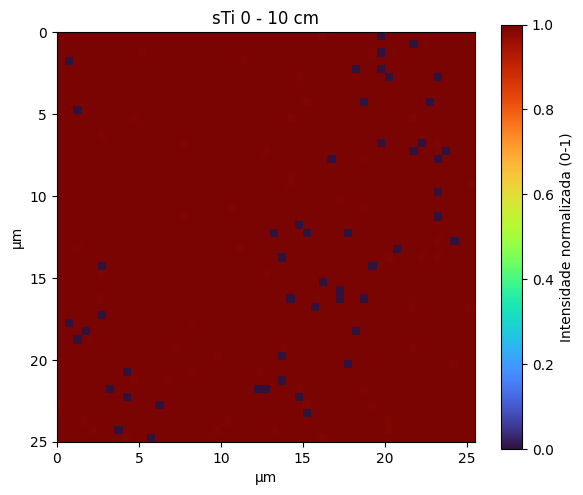

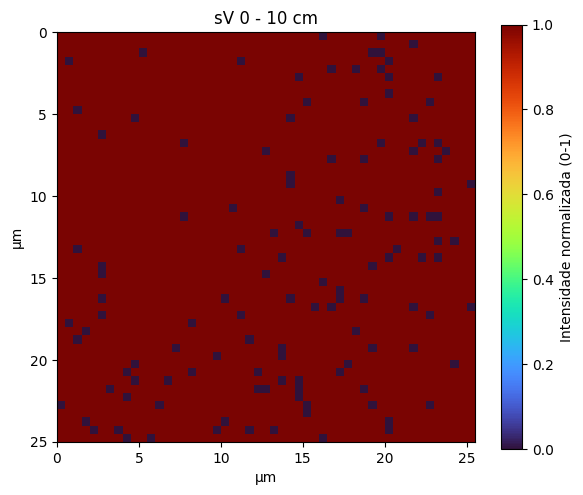

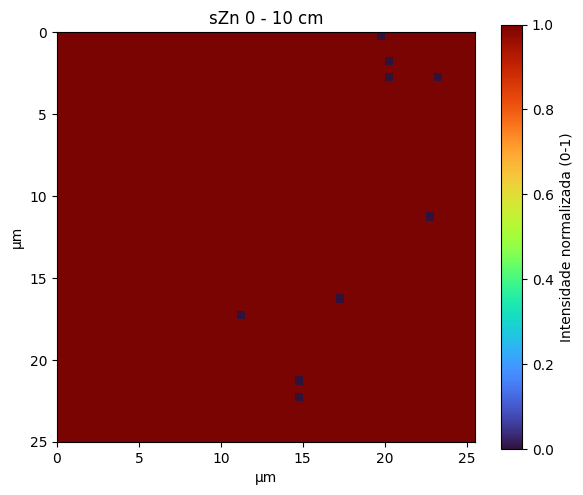

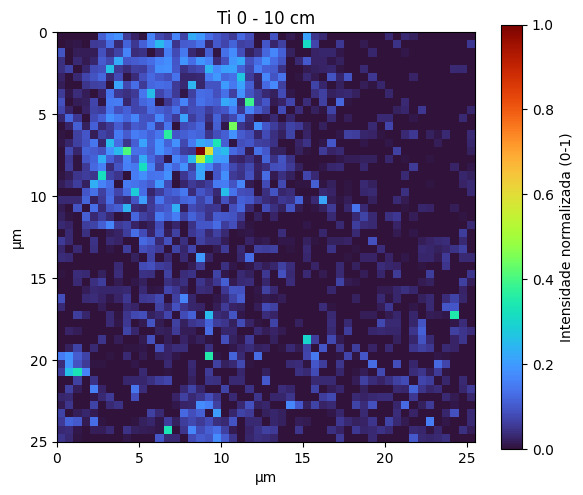

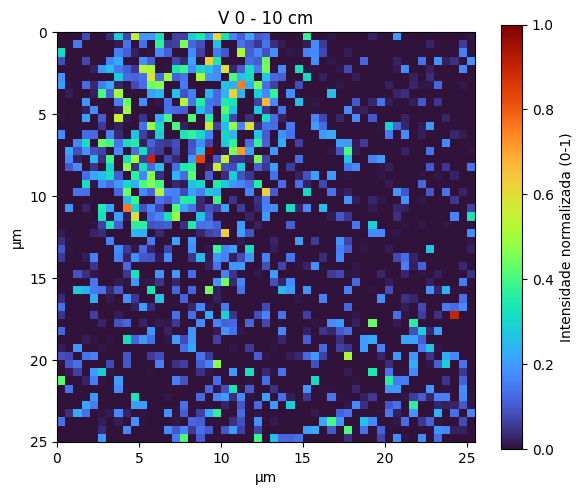

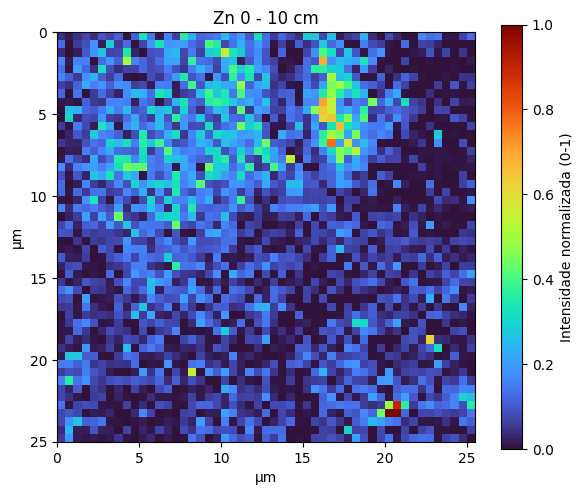

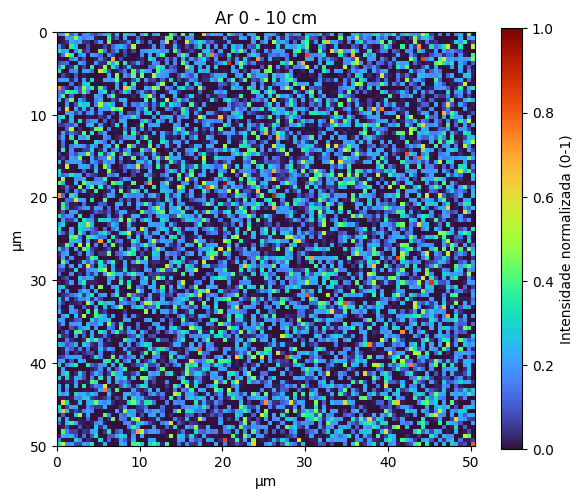

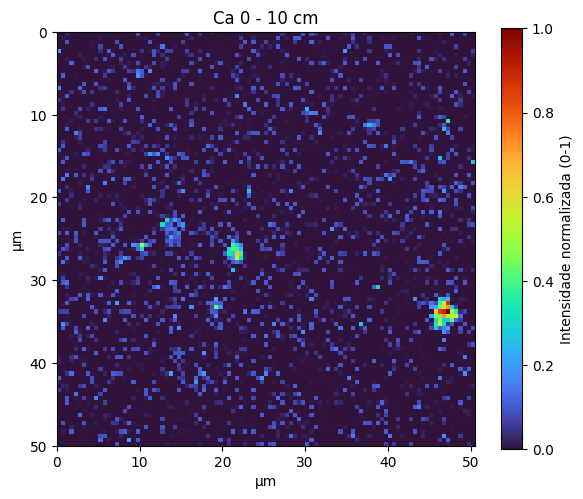

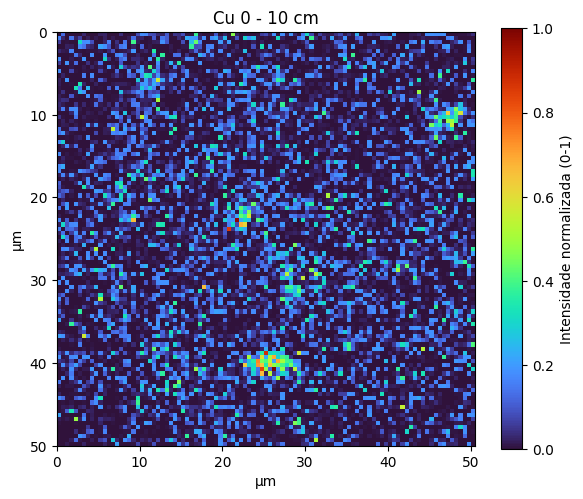

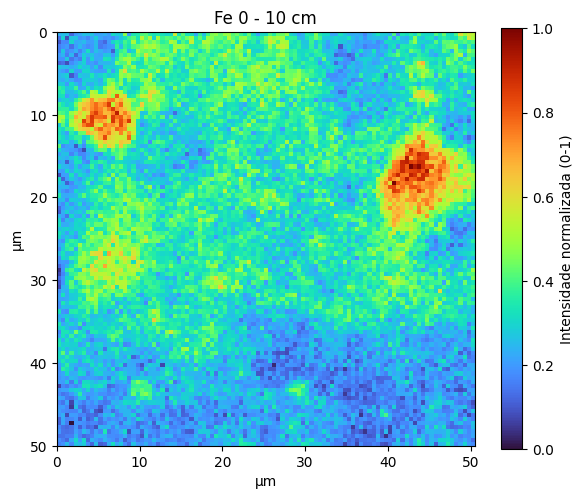

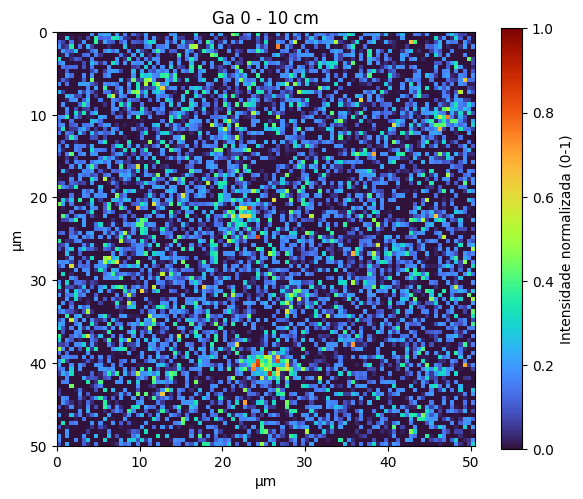

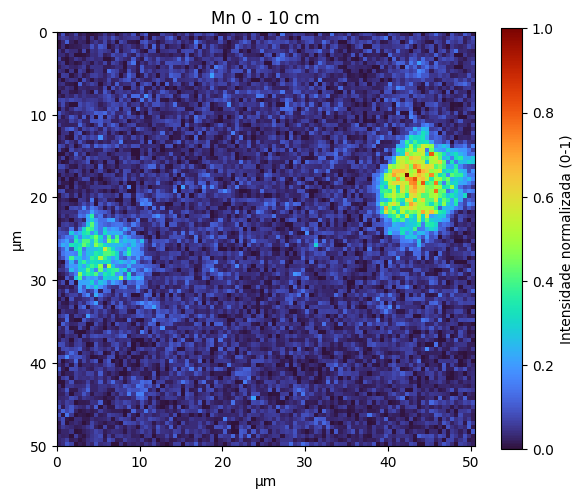

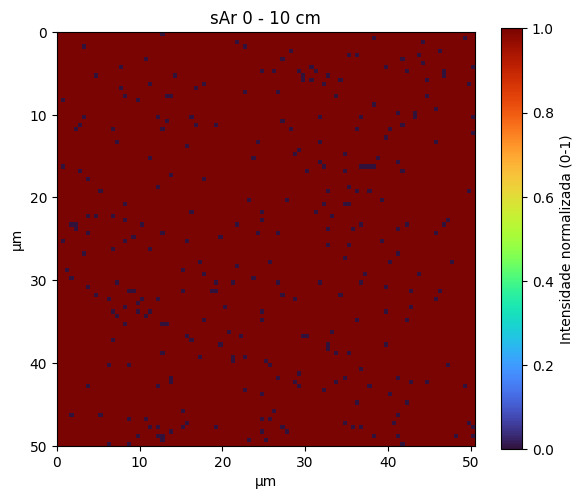

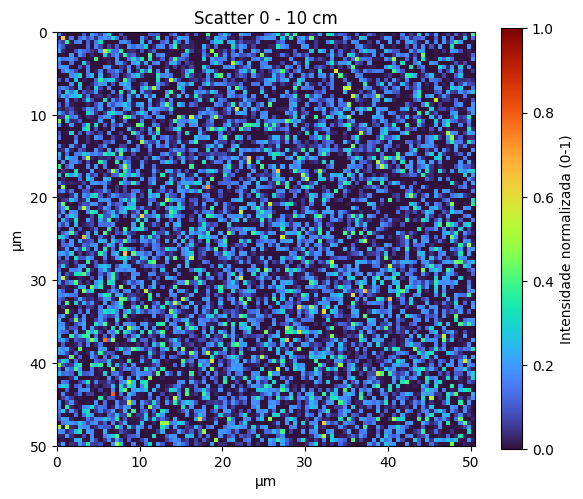

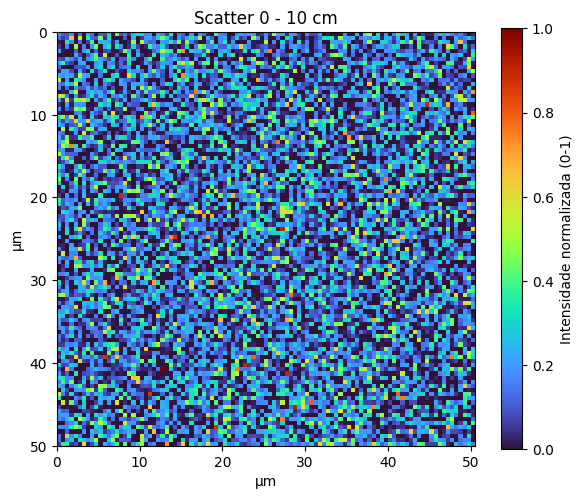

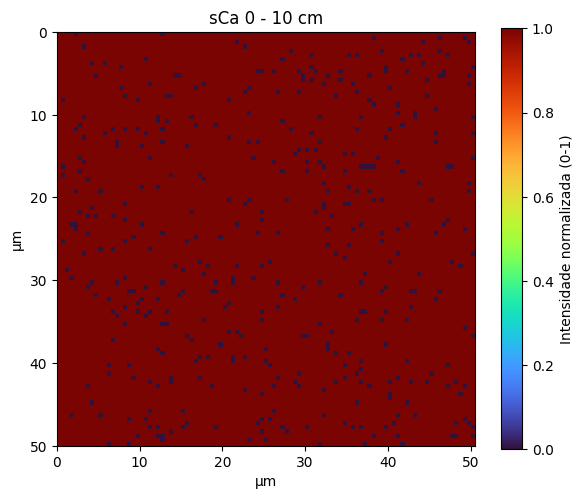

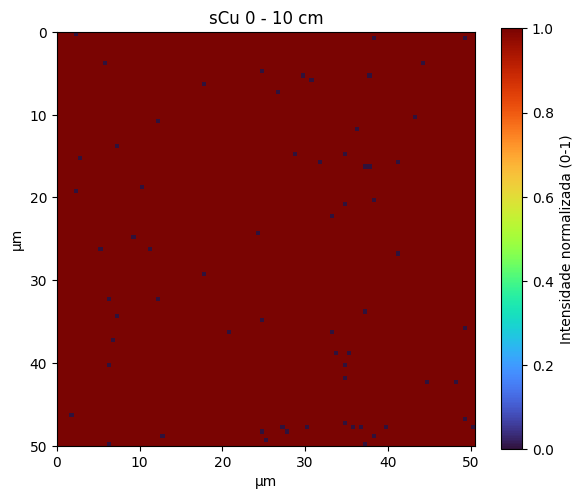

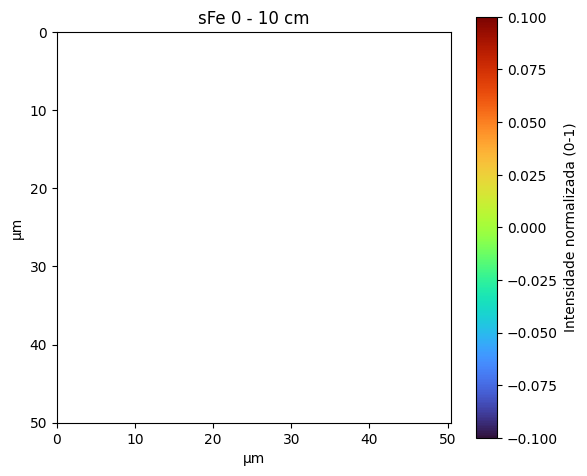

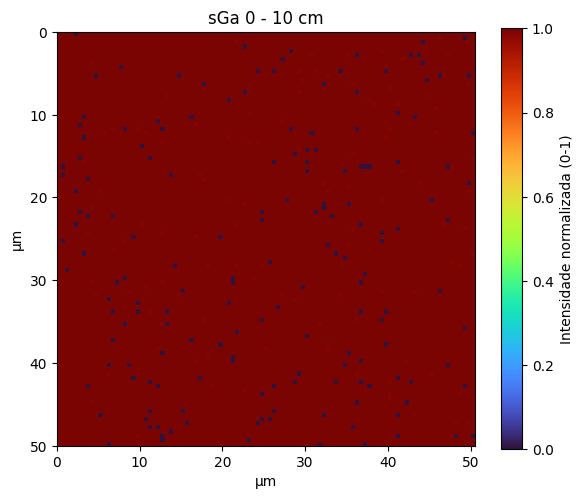

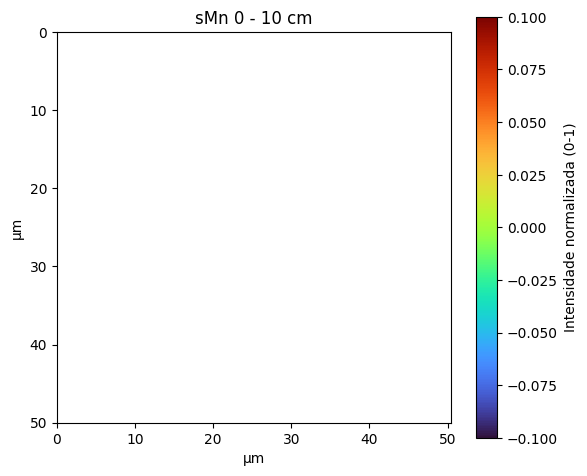

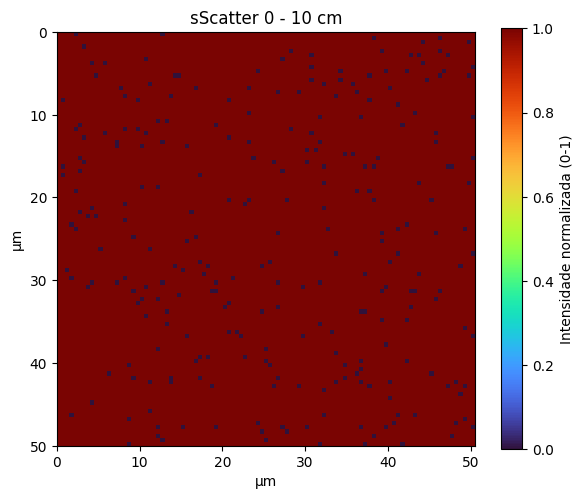

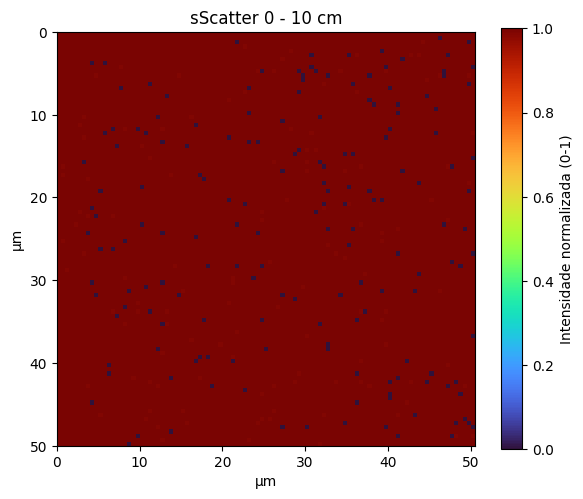

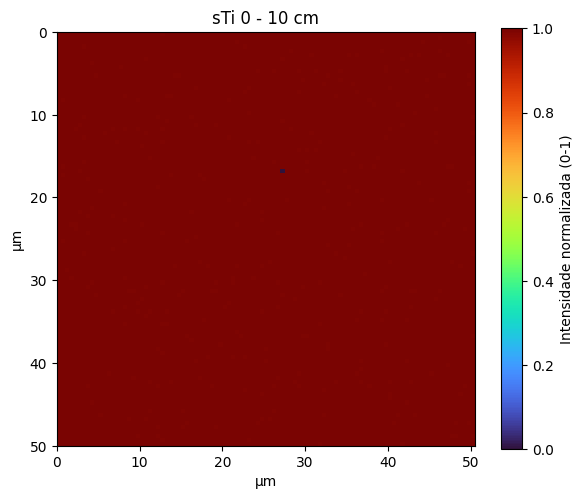

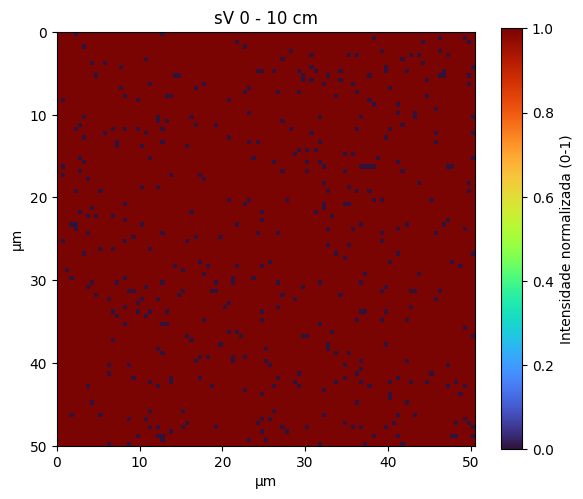

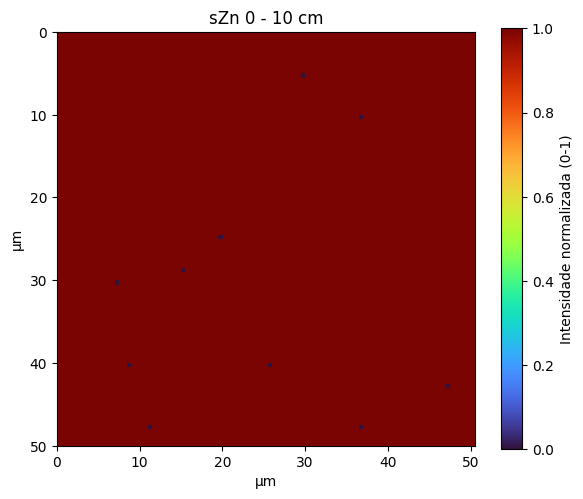

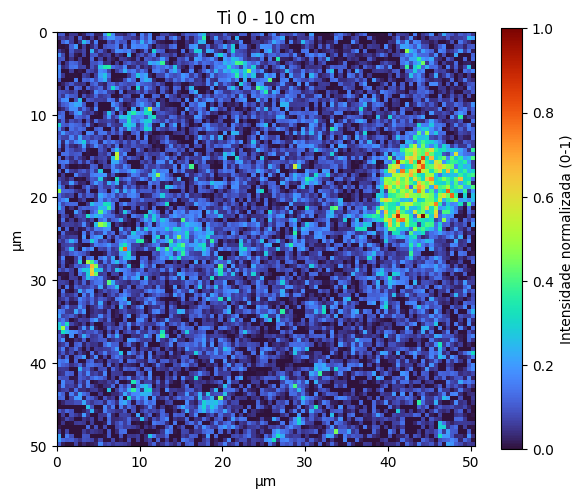

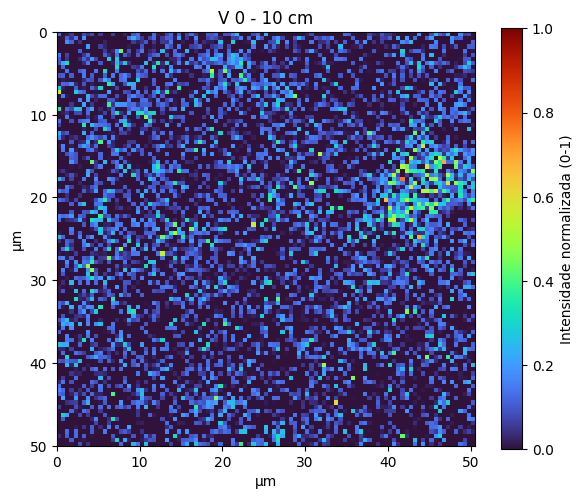

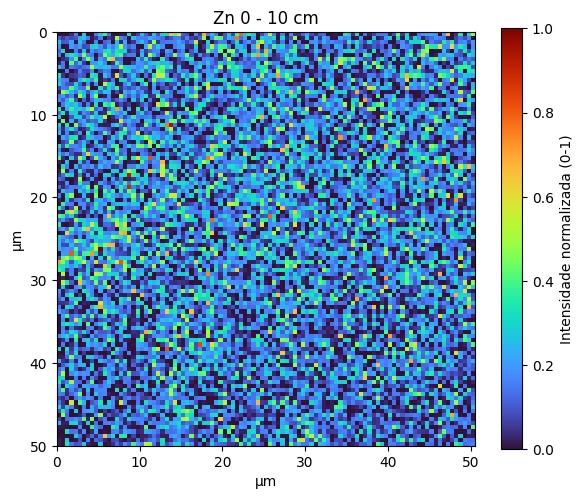

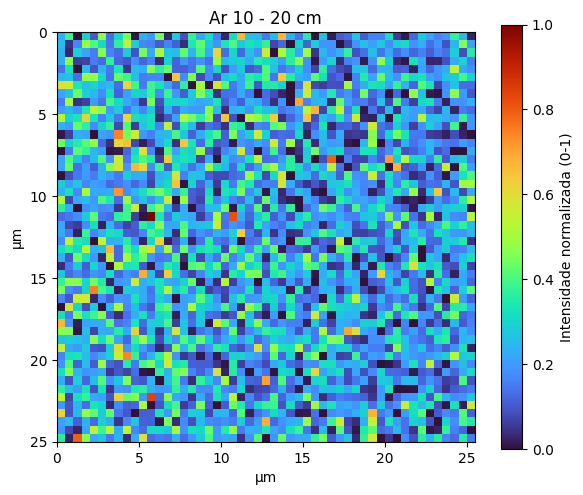

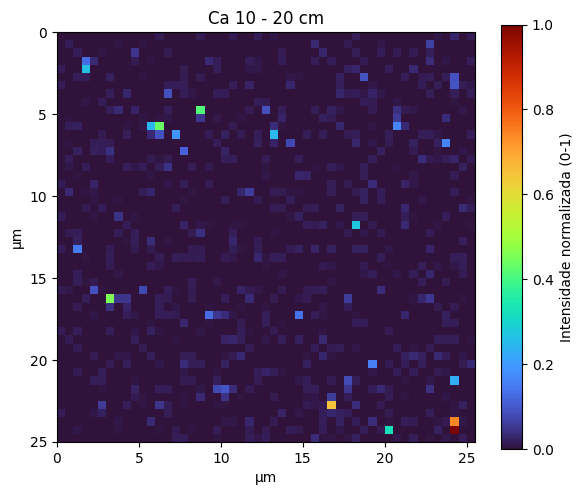

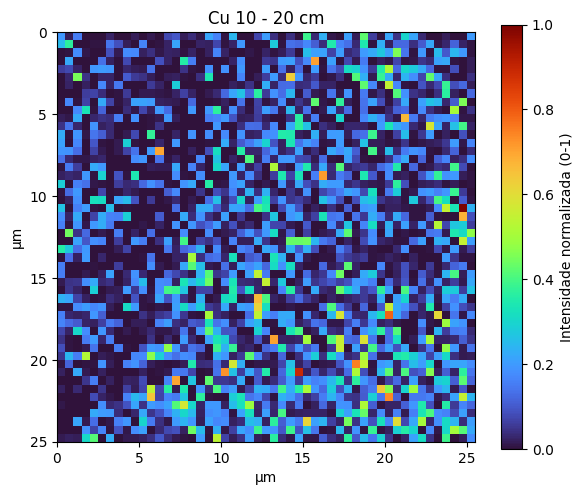

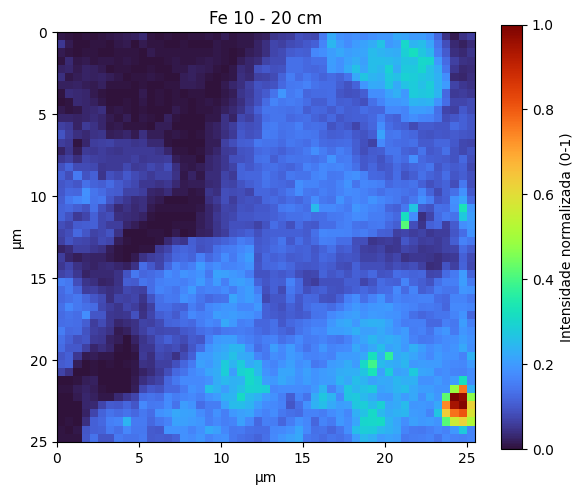

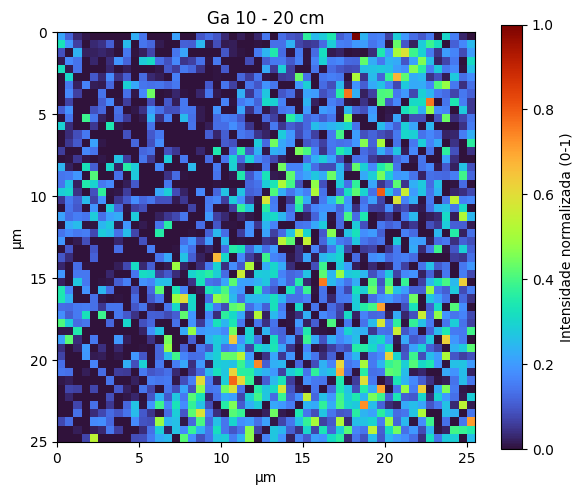

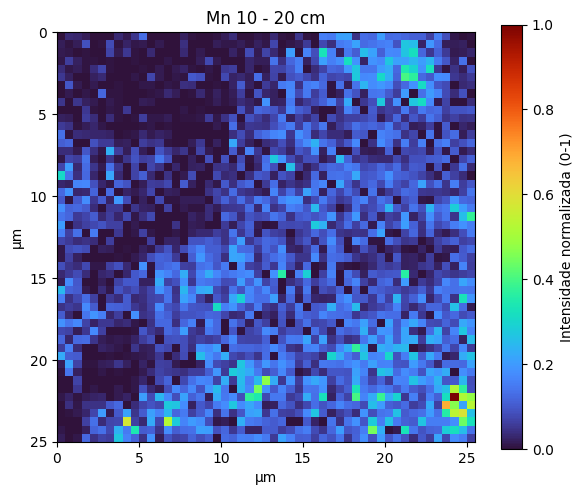

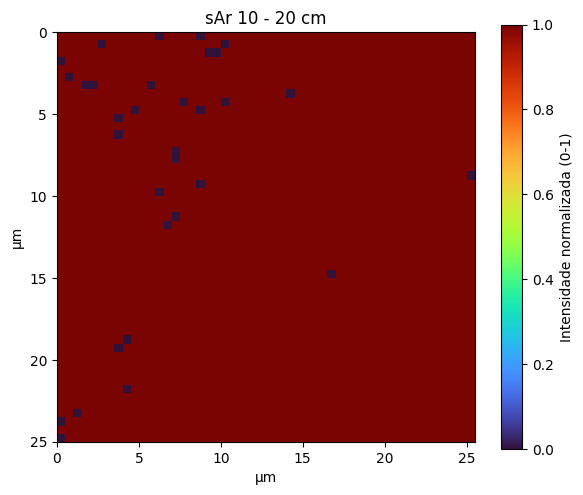

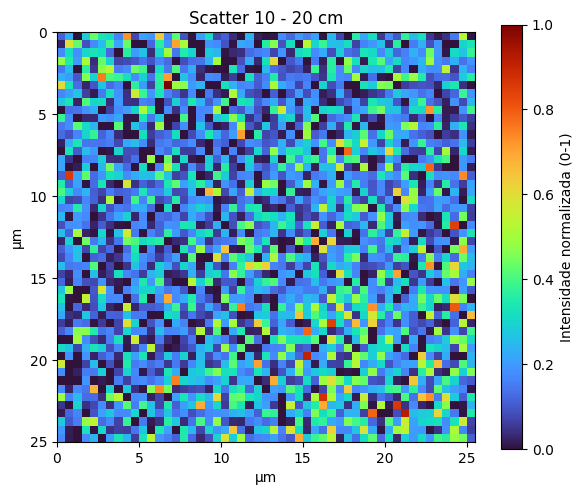

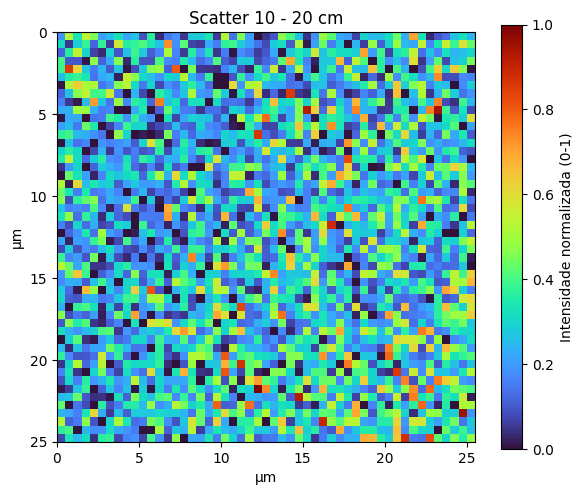

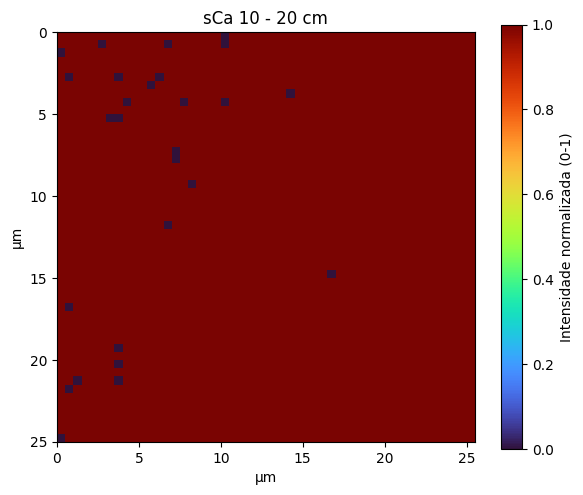

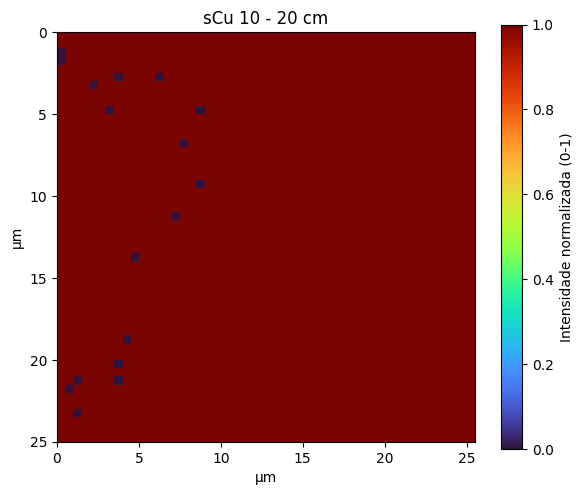

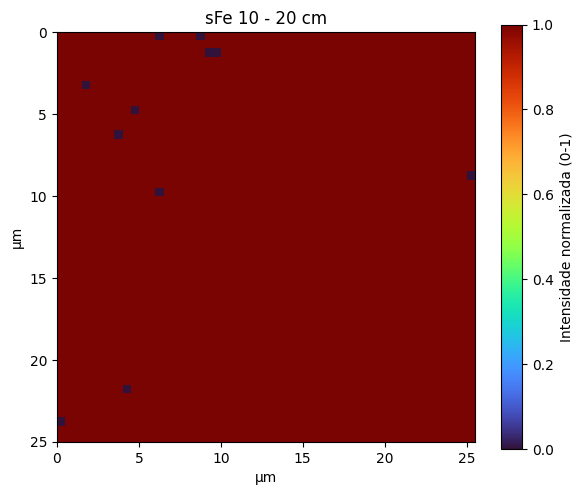

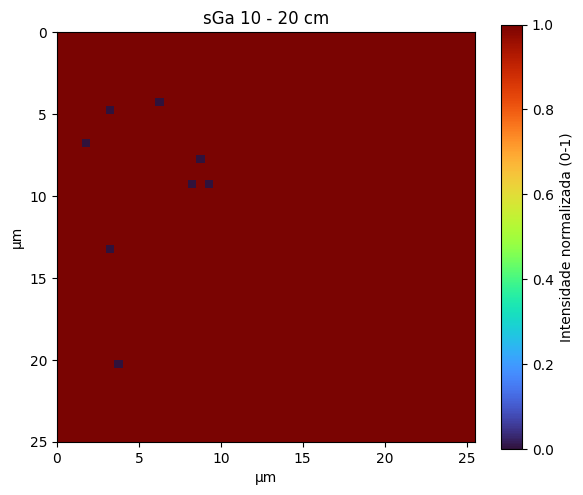

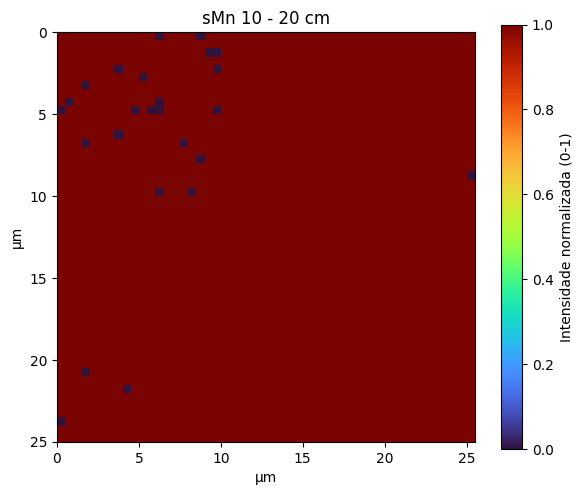

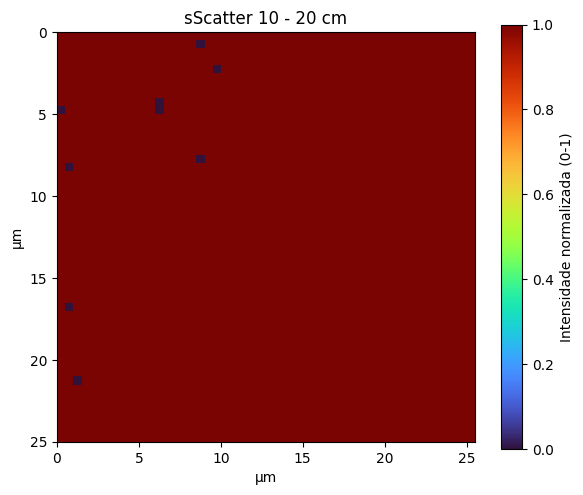

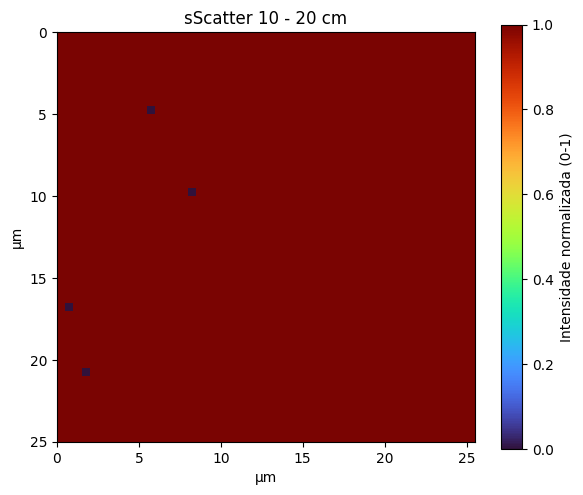

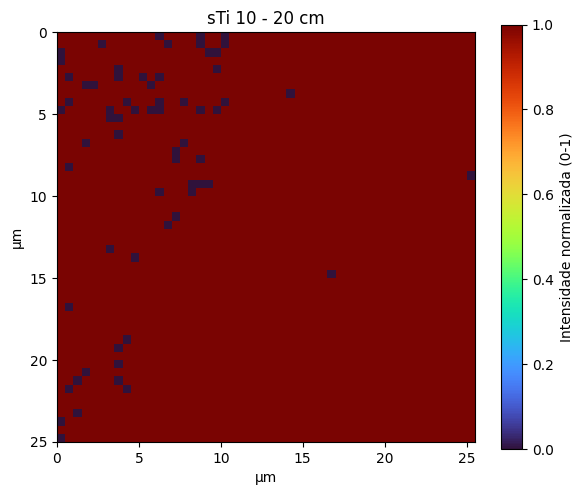

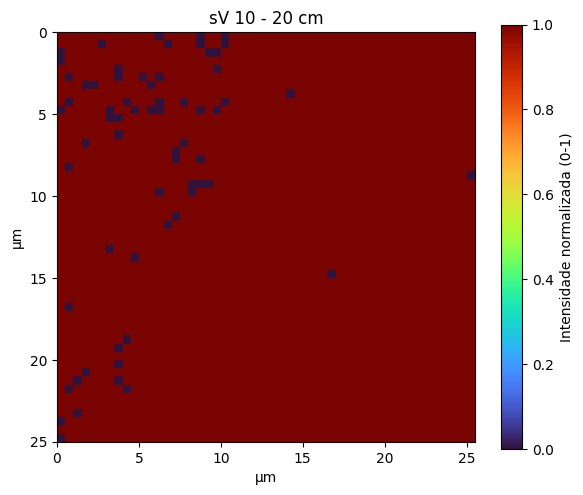

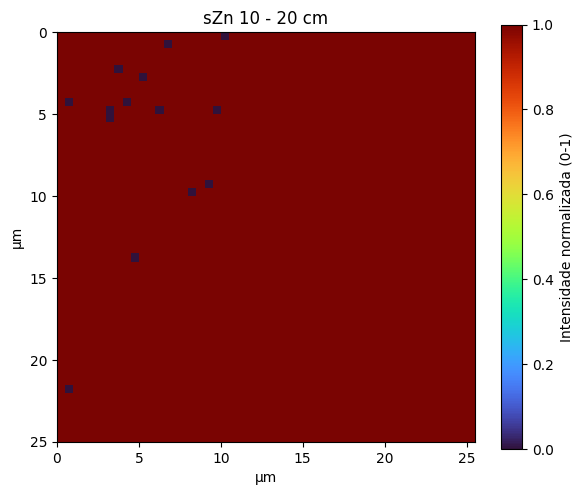

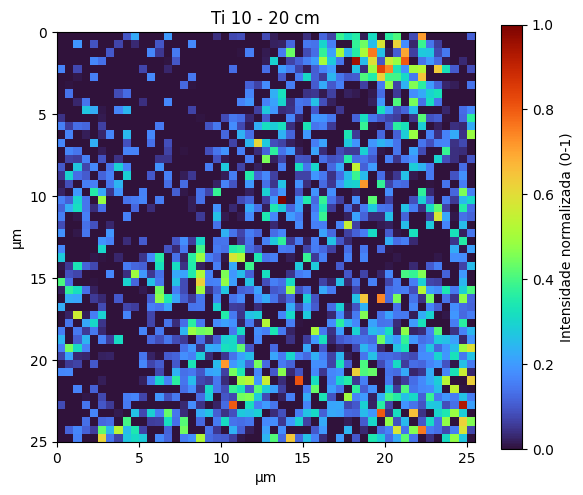

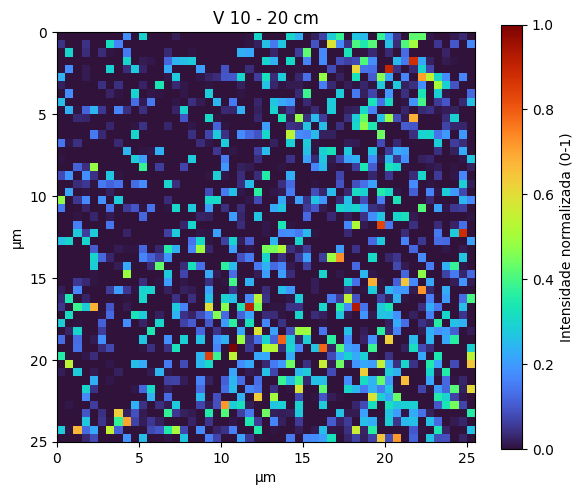

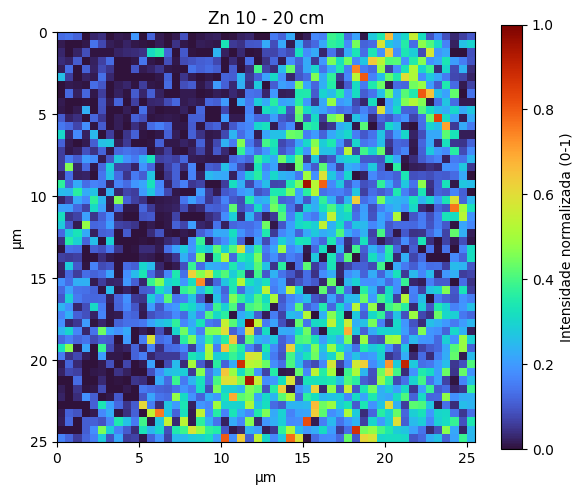

TiffFileError: not a TIFF file b'\x89PNG'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from pathlib import Path
import os

poscar_dir = Path('images_tiff/')
files = list(poscar_dir.iterdir())  

pixel_size_um = 0.5

for file in files:
    for item in list(file.iterdir()):

        saida = f"{file.name}/nearest"
        os.makedirs(saida, exist_ok=True)

        img = tifffile.imread(item)
        if img.ndim == 3:
            img = img[:, :, 0] 

        img_norm = (img - img.min()) / (img.max() - img.min())

        ny, nx = img_norm.shape
        extent = [0, nx * pixel_size_um, ny * pixel_size_um, 0]

        plt.figure(figsize=(6,5))
        plt.imshow(img_norm, cmap='turbo', extent = extent)
        plt.colorbar(label='Intensidade normalizada (0-1)')
        plt.xlabel("µm")
        plt.ylabel("µm")

        if 'A'in item.name.split('_')[0]:
            plt.title(f"{item.name.split('_')[1]} 0 - 10 cm")
        else:
            plt.title(f"{item.name.split('_')[1]} 10 - 20 cm")

        plt.tight_layout()
        plt.savefig(os.path.join(saida, f"scale_{item.name}.png"), dpi=600)
        plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from pathlib import Path
import os

poscar_dir = Path('images_tiff/')
files = list(poscar_dir.iterdir())  

pixel_size_um = 0.5  # 500 nm = 0.5 µm

for file in files:
    for item in file.iterdir():
        
        # só processa arquivos .tif ou .tiff
        if item.suffix.lower() not in [".tif", ".tiff"]:
            continue  

        # cria pasta de saída dentro da pasta atual
        saida = file / "bilinear"
        os.makedirs(saida, exist_ok=True)

        # abre a imagem
        img = tifffile.imread(item)
        if img.ndim == 3:  # pega primeiro canal se for RGB
            img = img[:, :, 0] 

        # normalização da imagem
        img_norm = (img - img.min()) / (img.max() - img.min())

        # calcular dimensões da imagem em µm
        ny, nx = img_norm.shape
        extent = [0, nx * pixel_size_um, ny * pixel_size_um, 0]

        # plota com escala automática
        plt.figure(figsize=(6,5))
        plt.imshow(img_norm, cmap='turbo', extent=extent, interpolation="bilinear")
        plt.colorbar(label='Intensidade normalizada (0-1)')
        plt.xlabel("µm")
        plt.ylabel("µm")

        # título
        if 'A' in item.name.split('_')[0]:
            plt.title(f"{item.name.split('_')[1]} 0 - 10 cm")
        else:
            plt.title(f"{item.name.split('_')[1]} 10 - 20 cm")

        plt.tight_layout()
        plt.savefig(saida / f"scale_{item.stem}.png", dpi=600)
        plt.close()

C:\Users\davi23037\AppData\Local\Temp\ipykernel_15296\588915860.py:29: RuntimeWarning: invalid value encountered in divide
  img_norm = (img - img.min()) / (img.max() - img.min())


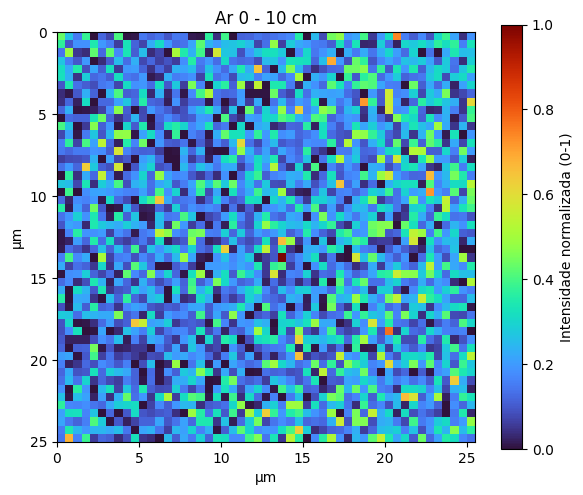

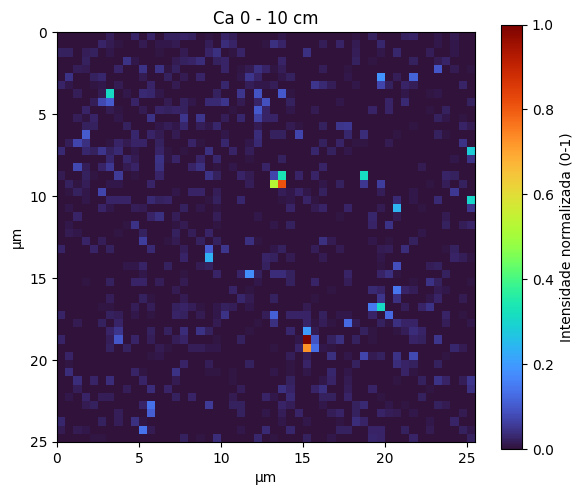

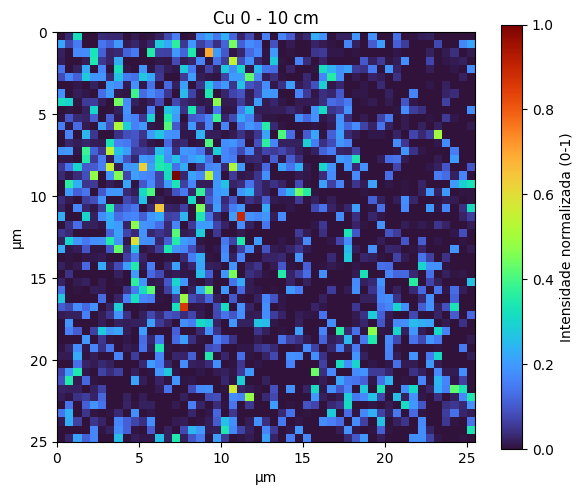

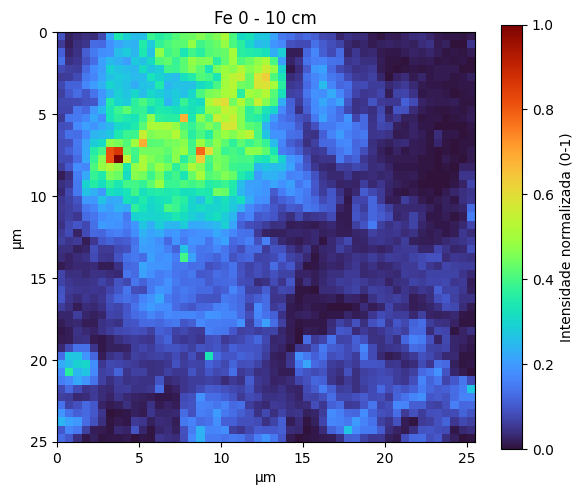

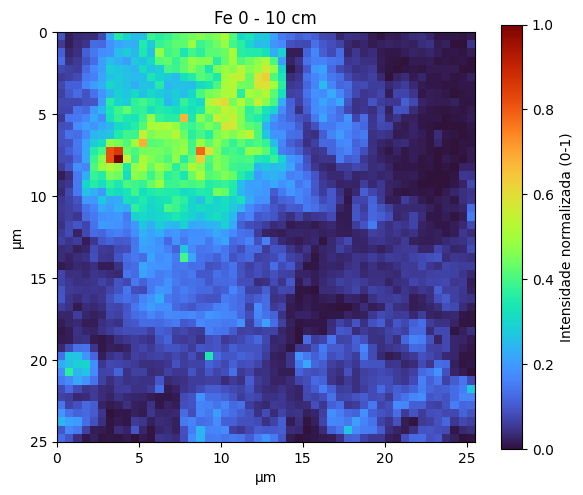

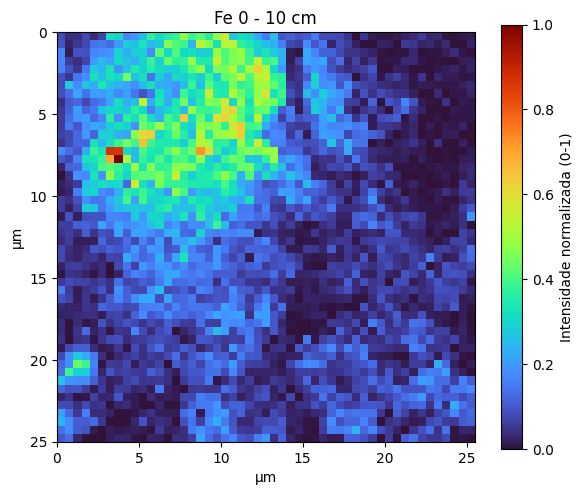

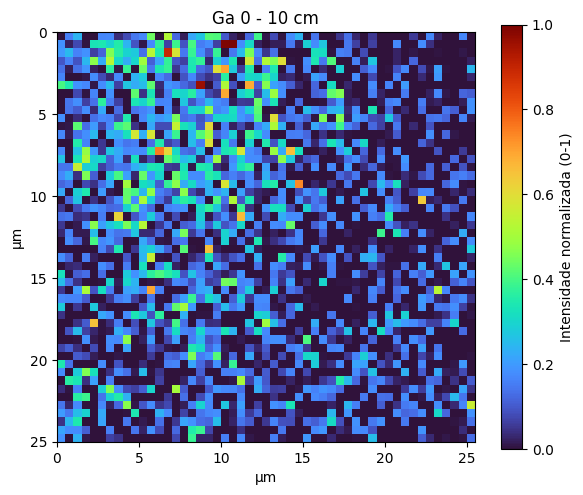

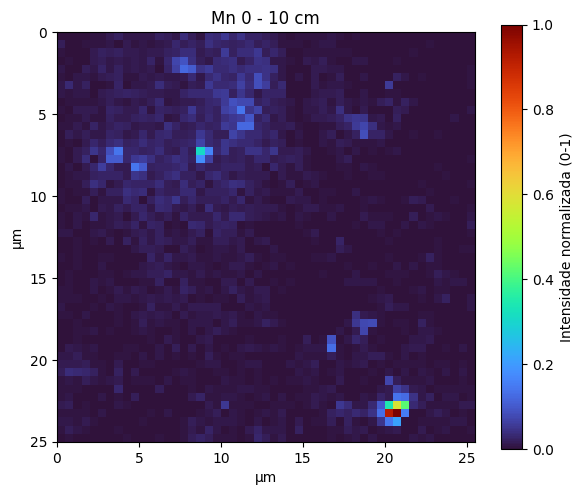

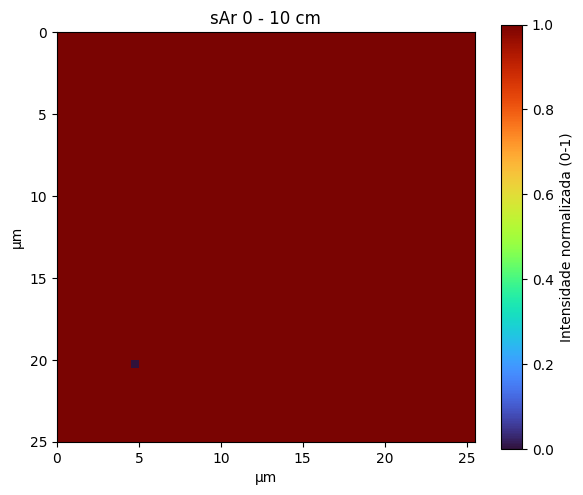

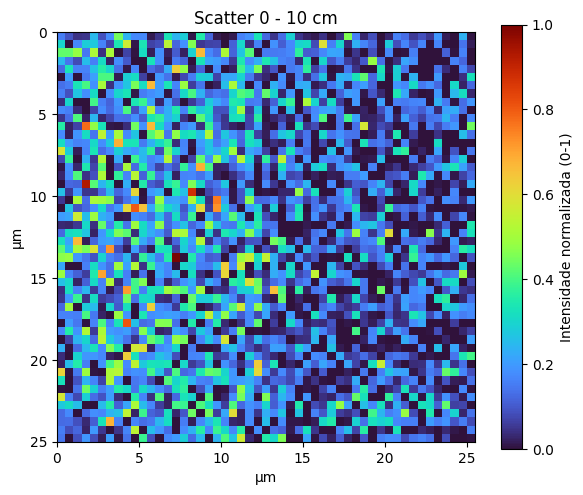

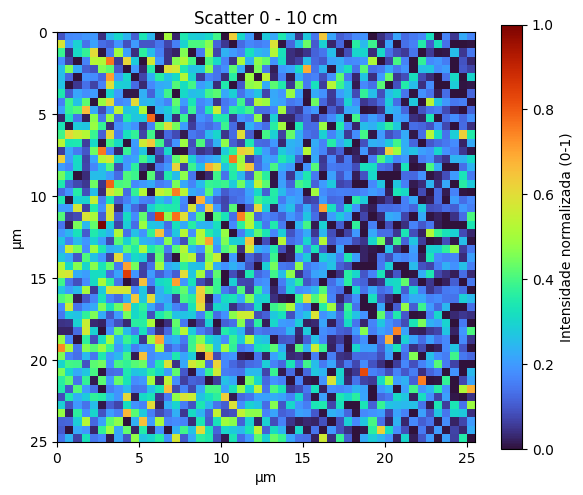

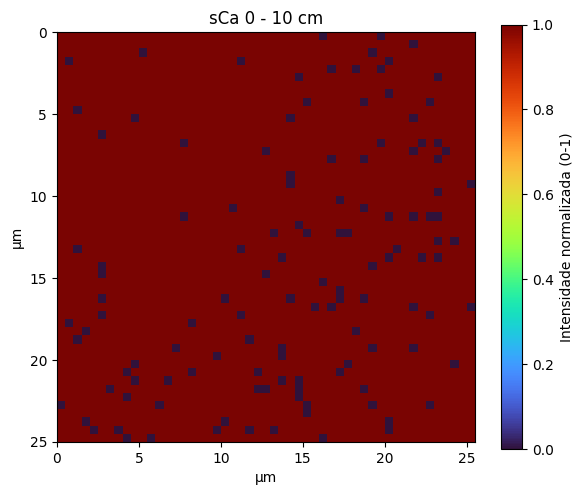

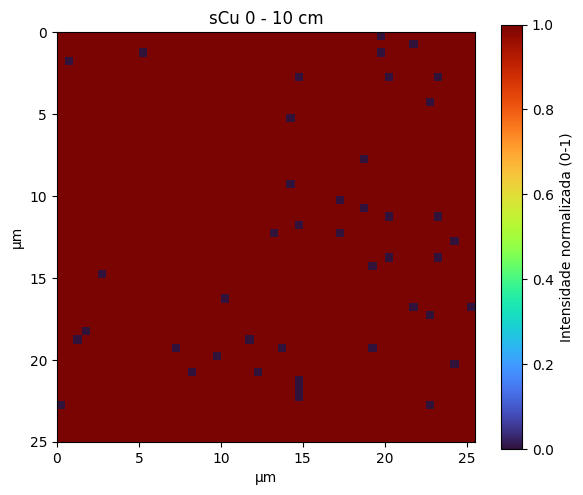

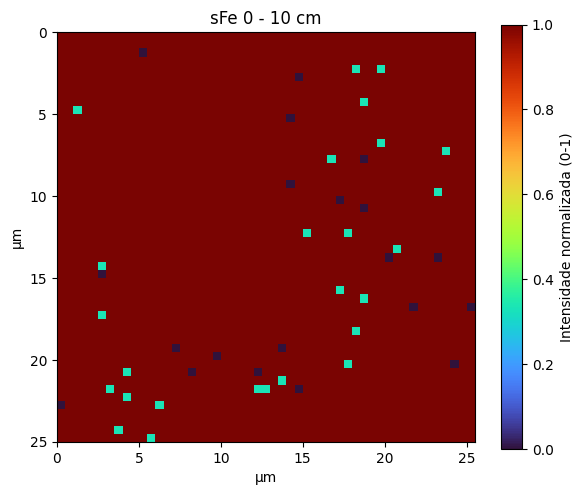

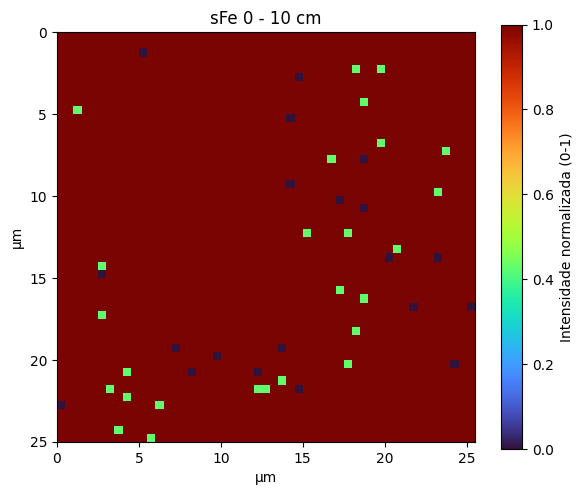

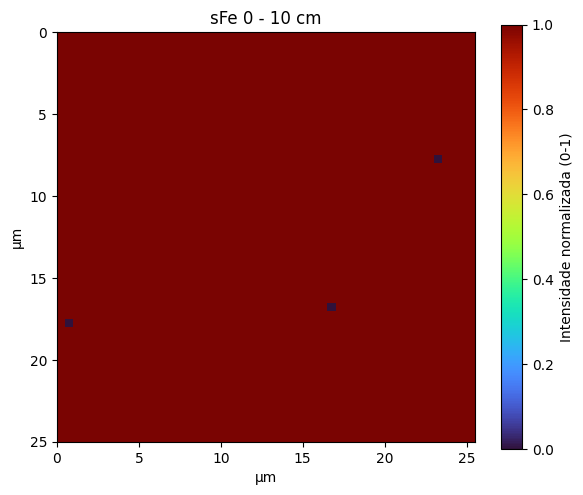

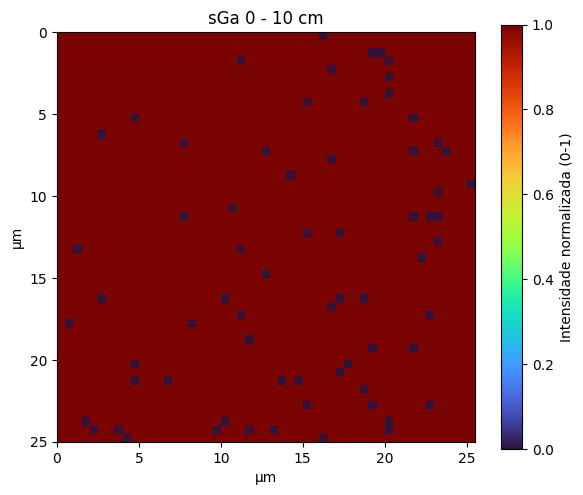

C:\Users\davi23037\AppData\Local\Temp\ipykernel_15296\1833645024.py:22: RuntimeWarning: invalid value encountered in divide
  img_norm = (img - img.min()) / (img.max() - img.min())


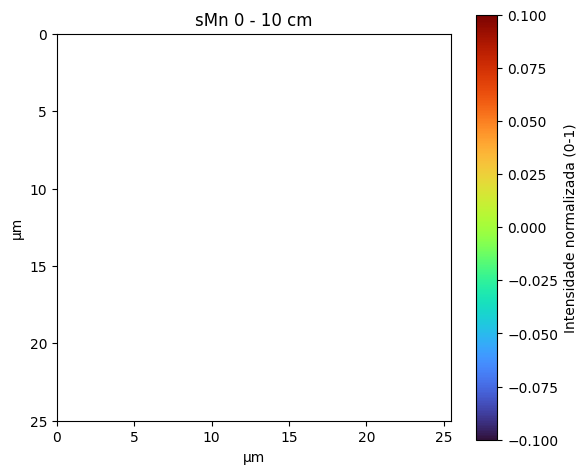

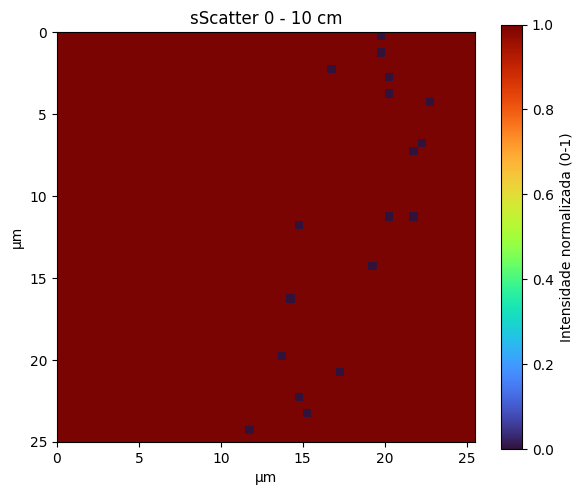

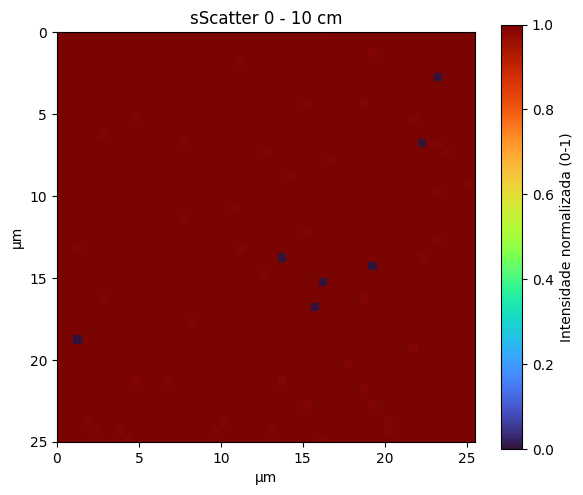

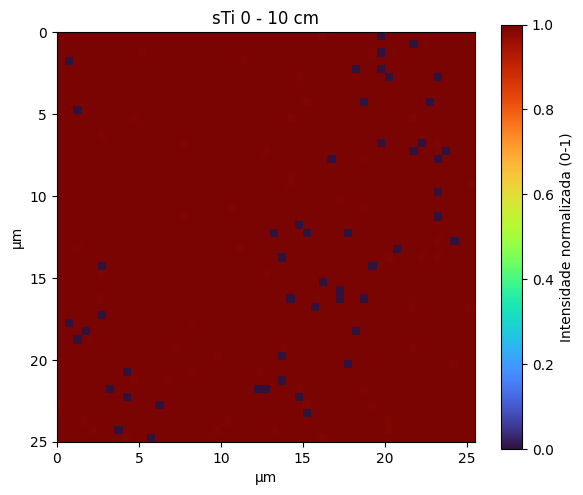

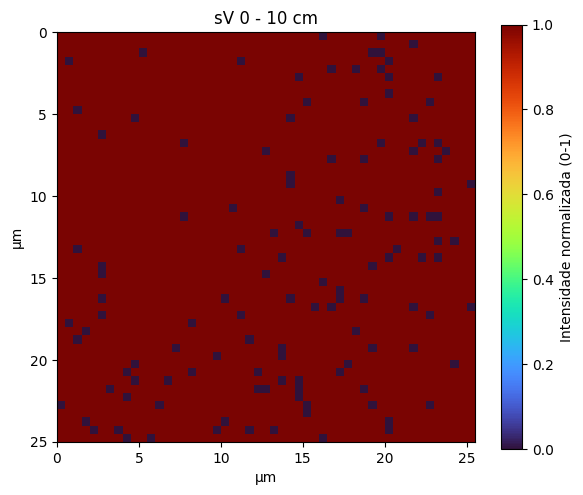

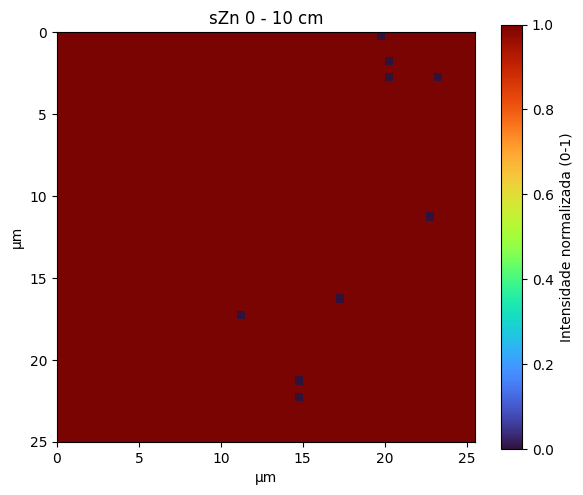

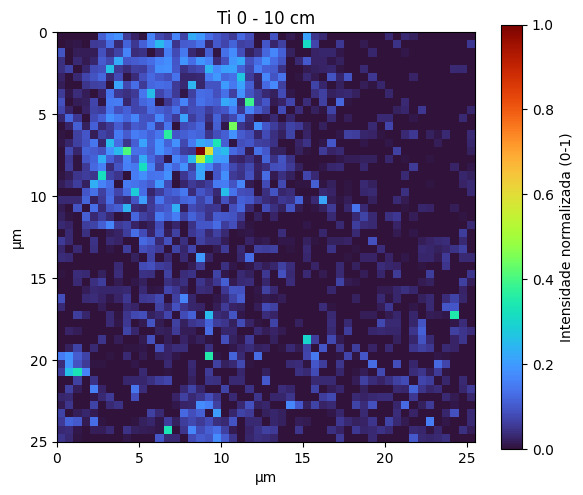

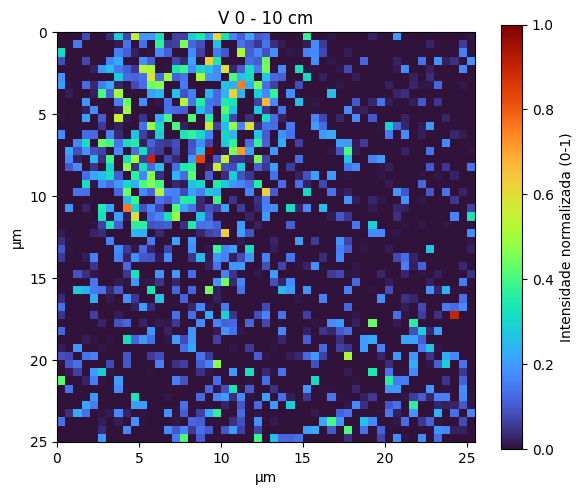

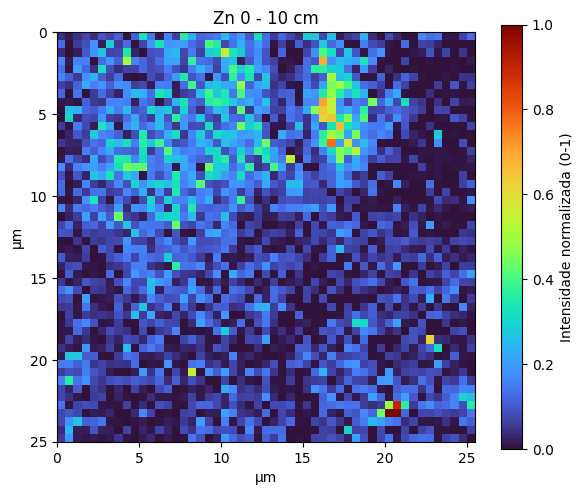

TiffFileError: not a TIFF file b'\x89PNG'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from pathlib import Path
import os

poscar_dir = Path('images_tiff/')
files = list(poscar_dir.iterdir())  

pixel_size_um = 0.5  # 500 nm = 0.5 micrômetros

for file in files:
    for item in list(file.iterdir()):

        saida = f"scale_{file.name}/nearest"
        os.makedirs(saida, exist_ok=True)

        img = tifffile.imread(item)
        if img.ndim == 3:
            img = img[:, :, 0] 

        img_norm = (img - img.min()) / (img.max() - img.min())

        # calcular dimensões da imagem em micrômetros
        ny, nx = img_norm.shape
        extent = [0, nx * pixel_size_um, ny * pixel_size_um, 0]  

        plt.figure(figsize=(6,5))
        plt.imshow(img_norm, cmap='turbo', extent=extent)
        plt.colorbar(label='Intensidade normalizada (0-1)')
        plt.xlabel("µm")
        plt.ylabel("µm")

        if 'A'in item.name.split('_')[0]:
            plt.title(f"{item.name.split('_')[1]} 0 - 10 cm")
        else:
            plt.title(f"{item.name.split('_')[1]} 10 - 20 cm")

        plt.tight_layout()
        plt.savefig(os.path.join(saida, f"{item.name}.png"), dpi=600)
        plt.show()
